In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
gme_stock = pd.read_csv("../stock_prices/GME.csv", index_col=0)
gme_wc = pd.read_csv("../../data_works/wc_ts_exports/wc_GME.csv", low_memory=False, index_col=0)

amc_stock = pd.read_csv("../stock_prices/AMC.csv", index_col=0)
amc_wc = pd.read_csv("../../data_works/wc_ts_exports/wc_AMC.csv", low_memory=False, index_col=0)

bbby_stock = pd.read_csv("../stock_prices/GME.csv", index_col=0)
bbby_wc = pd.read_csv("../../data_works/wc_ts_exports/wc_BBBY.csv", low_memory=False, index_col=0)

doge_stock = pd.read_csv("../stock_prices/GME.csv", index_col=0)
doge_wc = pd.read_csv("../../data_works/wc_ts_exports/wc_DOGECOIN.csv", low_memory=False, index_col=0)

### Plotting

In [4]:
gme_stock["Open"]

Date
2020-11-27     3.822500
2020-11-30     4.542500
2020-12-01     4.277500
2020-12-02     3.925000
2020-12-03     4.120000
                ...    
2022-11-18    28.160000
2022-11-21    26.660000
2022-11-22    25.129999
2022-11-23    25.920000
2022-11-25    26.500000
Name: Open, Length: 503, dtype: float64

In [28]:
plotting_df_gme = pd.DataFrame(gme_stock)
plotting_df_gme["wordcount"] = gme_wc["word_count"]
plotting_df_gme.replace(np.nan, 0, inplace=True)

plotting_df_amc = pd.DataFrame(amc_stock)
plotting_df_amc["wordcount"] = amc_wc["word_count"]
plotting_df_amc.replace(np.nan, 0, inplace=True)

plotting_df_bbby = pd.DataFrame(bbby_stock)
plotting_df_bbby["wordcount"] = bbby_wc["word_count"]
plotting_df_bbby.replace(np.nan, 0, inplace=True)

plotting_df_doge = pd.DataFrame(doge_stock)
plotting_df_doge["wordcount"] = doge_wc["word_count"]
plotting_df_doge.replace(np.nan, 0, inplace=True)

# Normalize Wordcount
factor = plotting_df_gme["wordcount"].max()/plotting_df_gme["Open"].max()
plotting_df_gme["wordcount"] = plotting_df_gme["wordcount"]/factor

factor = plotting_df_amc["wordcount"].max()/plotting_df_amc["Open"].max()
plotting_df_amc["wordcount"] = plotting_df_amc["wordcount"]/factor

factor = plotting_df_bbby["wordcount"].max()/plotting_df_bbby["Open"].max()
plotting_df_bbby["wordcount"] = plotting_df_bbby["wordcount"]/factor

factor = plotting_df_doge["wordcount"].max()/plotting_df_doge["Open"].max()
plotting_df_doge["wordcount"] = plotting_df_doge["wordcount"]/factor

# Index to datetime format
plotting_df_gme.index = pd.DatetimeIndex(plotting_df_gme.index)
plotting_df_gme.head(10)

plotting_df_amc.index = pd.DatetimeIndex(plotting_df_amc.index)
plotting_df_amc.head(10)

plotting_df_bbby.index = pd.DatetimeIndex(plotting_df_bbby.index)
plotting_df_bbby.head(10)

plotting_df_doge.index = pd.DatetimeIndex(plotting_df_doge.index)
plotting_df_doge.head(10)

,Open,wordcount
Date,,
2020-11-27,3.8225,0.0
2020-11-30,4.5425,0.0
2020-12-01,4.2775,0.0
2020-12-02,3.9250,0.0
2020-12-03,4.1200,0.0
2020-12-04,4.0750,0.0
2020-12-07,4.2500,0.0
2020-12-08,4.0925,0.0
2020-12-09,3.4800,0.0


In [26]:
from datetime import datetime
for i in range(len(plotting_df_amc.index)):
    datetime.strptime(plotting_df_amc.index[i], '%Y-%M-%d')

ValueError: unconverted data remains:  00:00:00-04:00

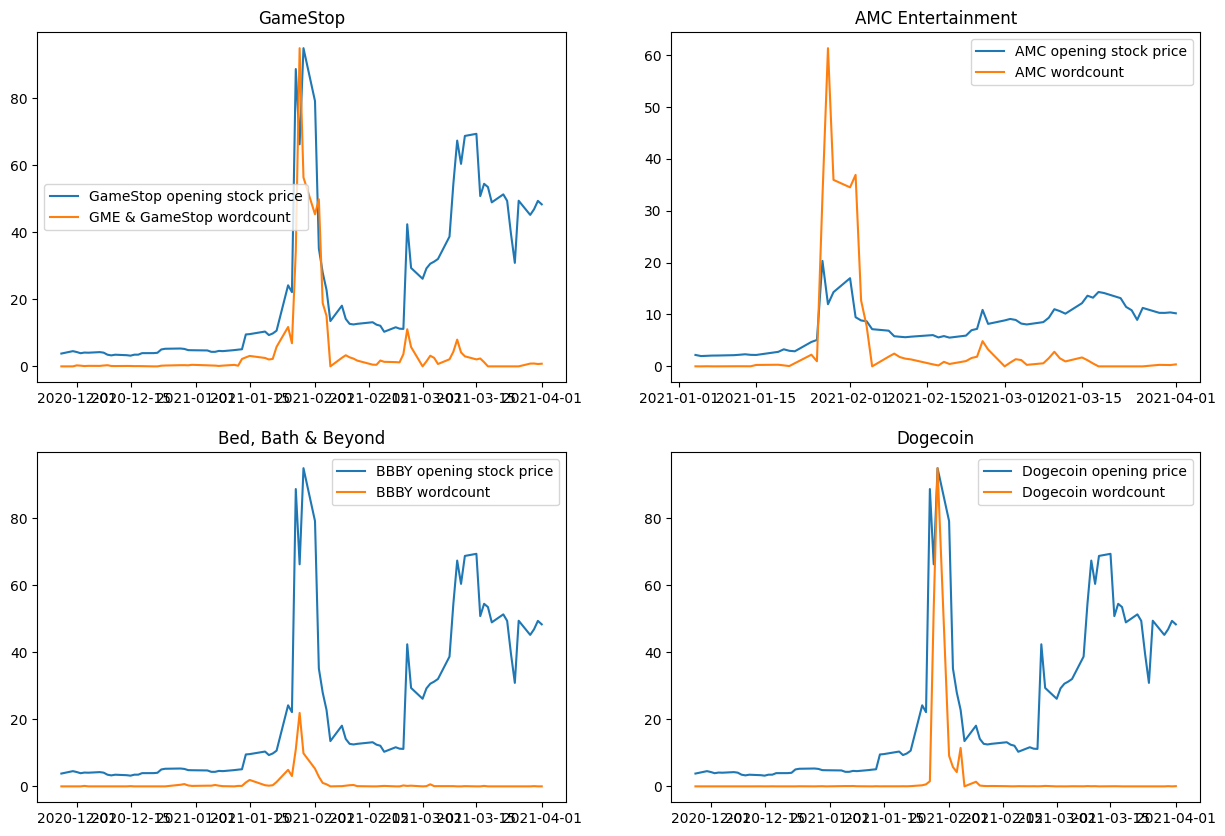

In [33]:
%matplotlib inline
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
ax1.plot(plotting_df_gme["Open"].loc[:"2021-04-01"], label="GameStop opening stock price")
ax1.plot(plotting_df_gme["wordcount"].loc[:"2021-04-01"], label="GME & GameStop wordcount")
ax1.set_title("GameStop")
ax1.legend()

ax2.plot(plotting_df_amc["Open"].loc[:"2021-04-01"], label="AMC opening stock price")
ax2.plot(plotting_df_amc["wordcount"].loc[:"2021-04-01"], label="AMC wordcount")
ax2.set_title("AMC Entertainment")
ax2.legend()

ax3.plot(plotting_df_bbby["Open"].loc[:"2021-04-01"], label="BBBY opening stock price")
ax3.plot(plotting_df_bbby["wordcount"].loc[:"2021-04-01"], label="BBBY wordcount")
ax3.set_title("Bed, Bath & Beyond")
ax3.legend()

ax4.plot(plotting_df_doge["Open"].loc[:"2021-04-01"], label="Dogecoin opening price")
ax4.plot(plotting_df_doge["wordcount"].loc[:"2021-04-01"], label="Dogecoin wordcount")
ax4.set_title("Dogecoin")
ax4.legend()

plt.show()

### Checking for offset
Determine by how much the reddit TS can serve as early indicator for the stock price.

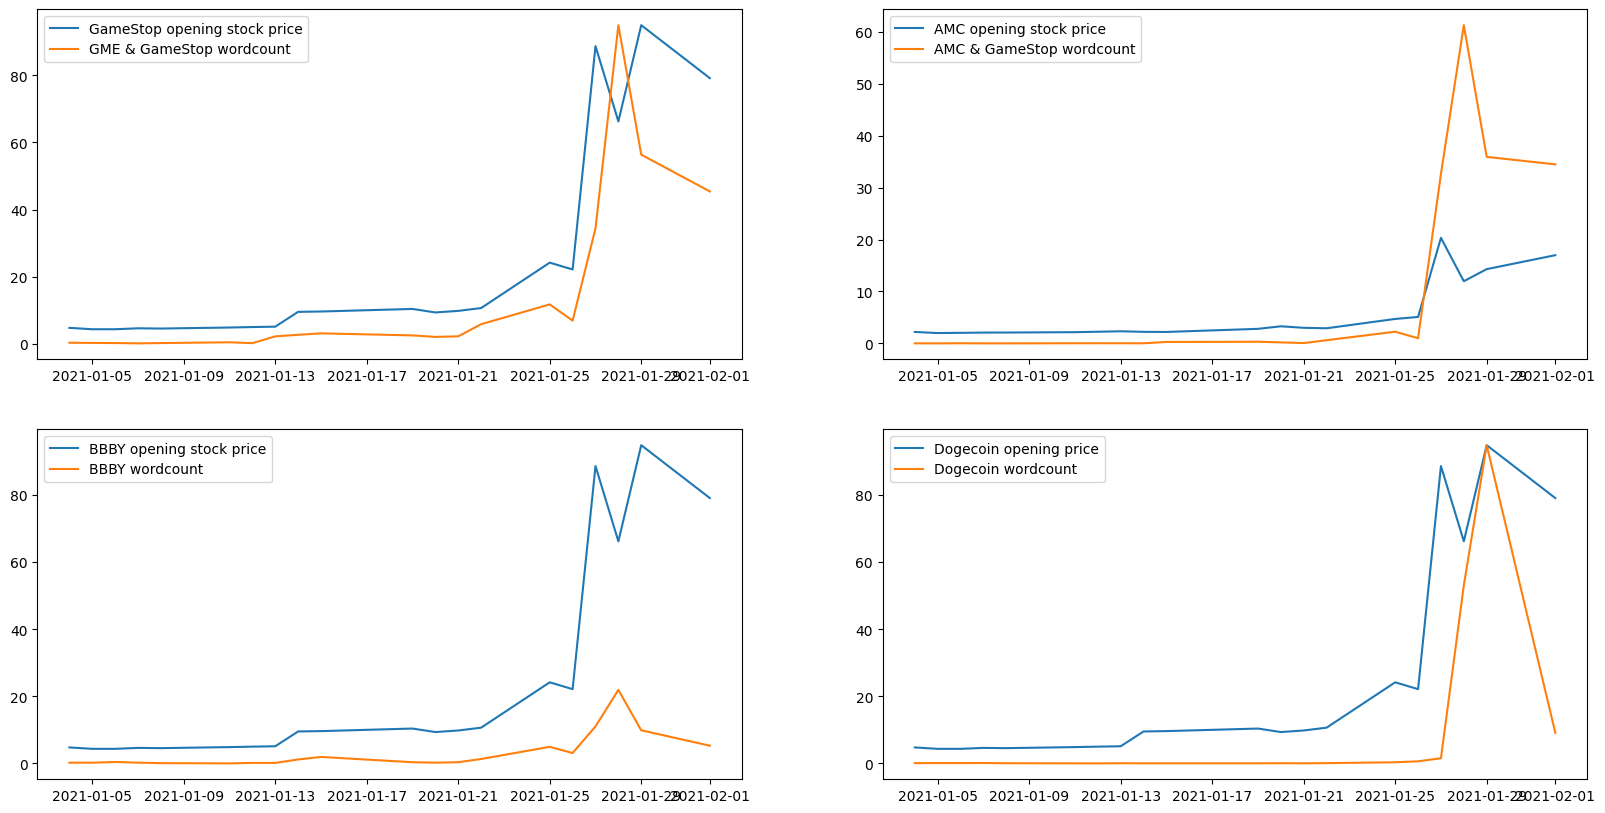

In [36]:
%matplotlib inline
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.plot(plotting_df_gme["Open"].loc["2021-01-01":"2021-02-01"], label="GameStop opening stock price") # .shift(-1)
ax1.plot(plotting_df_gme["wordcount"].loc["2021-01-01":"2021-02-01"], label="GME & GameStop wordcount")
ax1.legend()

ax2.plot(plotting_df_amc["Open"].loc["2021-01-01":"2021-02-01"], label="AMC opening stock price") # .shift(-1)
ax2.plot(plotting_df_amc["wordcount"].loc["2021-01-01":"2021-02-01"], label="AMC & GameStop wordcount")
ax2.legend()

ax3.plot(plotting_df_bbby["Open"].loc["2021-01-01":"2021-02-01"], label="BBBY opening stock price") # .shift(-1)
ax3.plot(plotting_df_bbby["wordcount"].loc["2021-01-01":"2021-02-01"], label="BBBY wordcount")
ax3.legend()

ax4.plot(plotting_df_doge["Open"].loc["2021-01-01":"2021-02-01"], label="Dogecoin opening price") # .shift(-1)
ax4.plot(plotting_df_doge["wordcount"].loc["2021-01-01":"2021-02-01"], label="Dogecoin wordcount")
ax4.legend()

plt.show()

In [8]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    
    if not wrap:
        return datax.corr(datay.shift(lag))
    shiftedy = datay.shift(lag)
    shiftedy.iloc[:lag] = datay.iloc[-lag:].values
    return datax.corr(shiftedy)

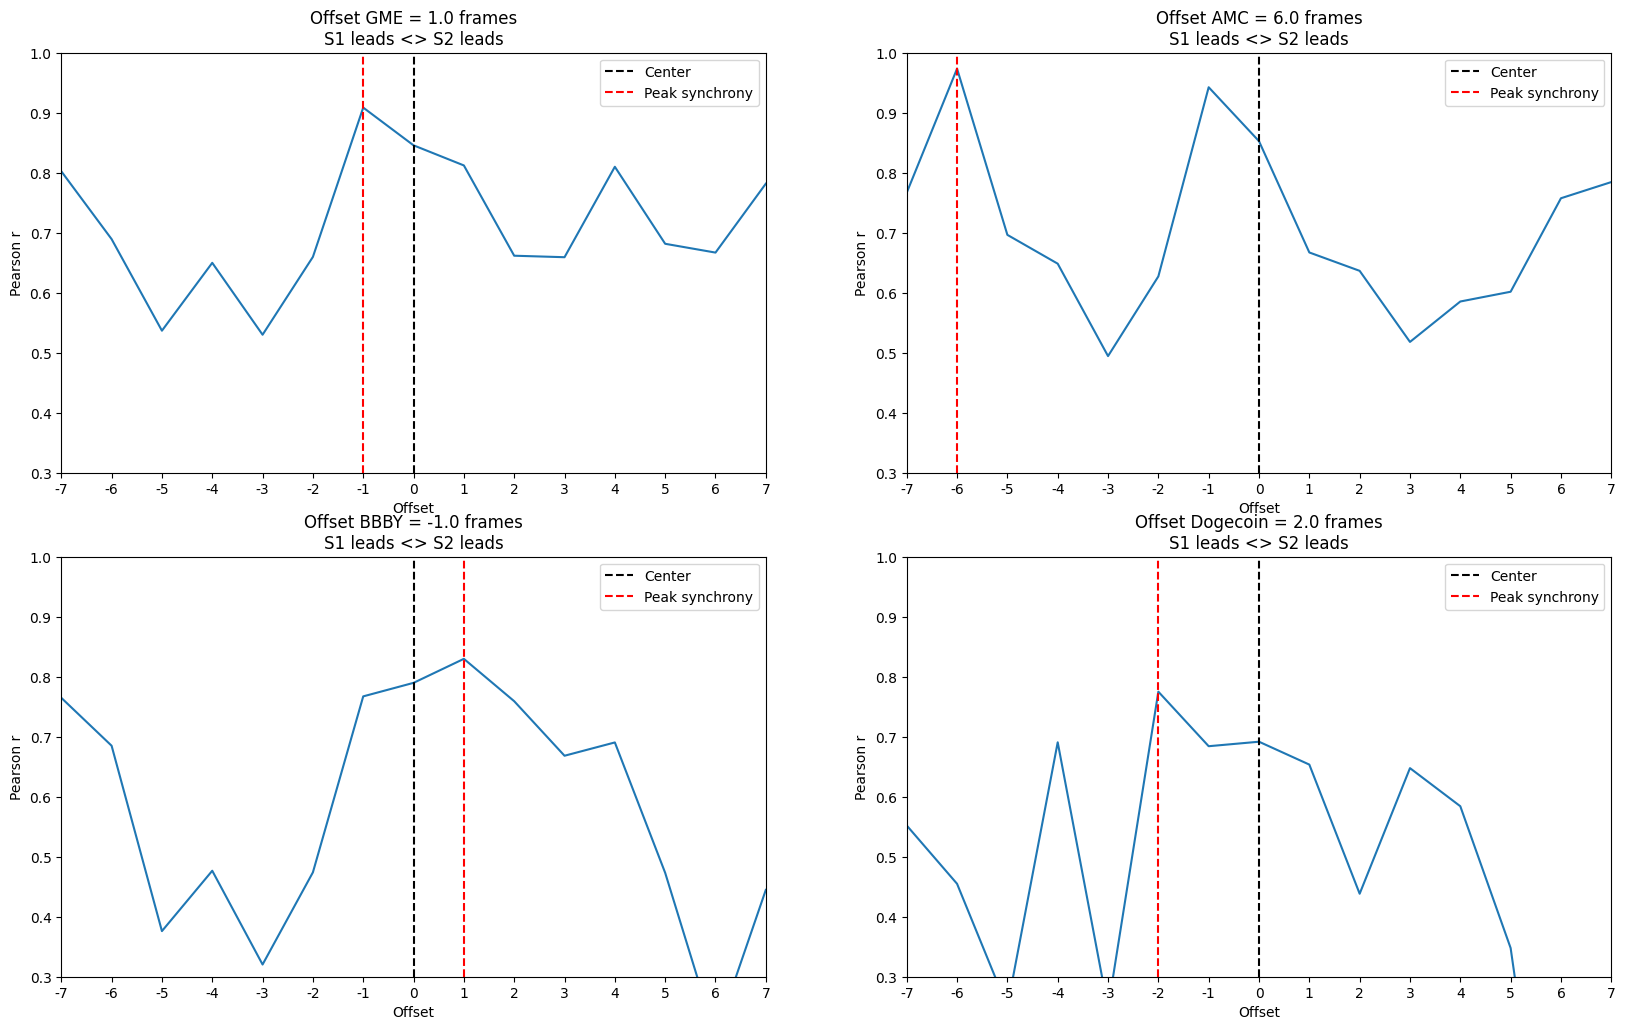

In [39]:
d1 = plotting_df_gme["Open"].loc["2021-01-01":"2021-02-01"]
d2 = plotting_df_gme["wordcount"].loc["2021-01-01":"2021-02-01"]

d3 = plotting_df_amc["Open"].loc["2021-01-01":"2021-02-01"]
d4 = plotting_df_amc["wordcount"].loc["2021-01-01":"2021-02-01"]

d5 = plotting_df_bbby["Open"].loc["2021-01-01":"2021-02-01"]
d6 = plotting_df_bbby["wordcount"].loc["2021-01-01":"2021-02-01"]

d7 = plotting_df_doge["Open"].loc["2021-01-01":"2021-02-01"]
d8 = plotting_df_doge["wordcount"].loc["2021-01-01":"2021-02-01"]

seconds = 1
fps = 7

rs_gme = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset_gme = np.floor(len(rs_gme)/2)-np.argmax(rs_gme)

rs_amc = [crosscorr(d3,d4, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset_amc = np.floor(len(rs_amc)/2)-np.argmax(rs_amc)

rs_bbby = [crosscorr(d5,d6, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset_bbby = np.floor(len(rs_bbby)/2)-np.argmax(rs_bbby)

rs_doge = [crosscorr(d7,d8, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset_doge = np.floor(len(rs_doge)/2)-np.argmax(rs_doge)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,12))

ax1.plot(rs_gme)
ax1.axvline(fps, color='k', linestyle='--', label='Center')
ax1.axvline(np.argmax(rs_gme),color='r',linestyle='--',label='Peak synchrony')
ax1.set(title=f'Offset GME = {offset_gme} frames\nS1 leads <> S2 leads',ylim=[.3,1],xlim=[0,10], xlabel='Offset',ylabel='Pearson r')
ax1.set_xticks(list(range(fps*2+1)))
ax1.set_xticklabels(list(range(-fps, fps+1)))
ax1.legend()

ax2.plot(rs_amc)
ax2.axvline(fps, color='k', linestyle='--', label='Center')
ax2.axvline(np.argmax(rs_amc),color='r',linestyle='--',label='Peak synchrony')
ax2.set(title=f'Offset AMC = {offset_amc} frames\nS1 leads <> S2 leads',ylim=[.3,1],xlim=[0,10], xlabel='Offset',ylabel='Pearson r')
ax2.set_xticks(list(range(fps*2+1)))
ax2.set_xticklabels(list(range(-fps, fps+1)))
ax2.legend()

ax3.plot(rs_bbby)
ax3.axvline(fps, color='k', linestyle='--', label='Center')
ax3.axvline(np.argmax(rs_bbby),color='r',linestyle='--',label='Peak synchrony')
ax3.set(title=f'Offset BBBY = {offset_bbby} frames\nS1 leads <> S2 leads',ylim=[.3,1],xlim=[0,10], xlabel='Offset',ylabel='Pearson r')
ax3.set_xticks(list(range(fps*2+1)))
ax3.set_xticklabels(list(range(-fps, fps+1)))
ax3.legend()

ax4.plot(rs_doge)
ax4.axvline(fps, color='k', linestyle='--', label='Center')
ax4.axvline(np.argmax(rs_doge),color='r',linestyle='--',label='Peak synchrony')
ax4.set(title=f'Offset Dogecoin = {offset_doge} frames\nS1 leads <> S2 leads',ylim=[.3,1],xlim=[0,10], xlabel='Offset',ylabel='Pearson r')
ax4.set_xticks(list(range(fps*2+1)))
ax4.set_xticklabels(list(range(-fps, fps+1)))
ax4.legend()

plt.show()